# heterograph: basics

## overview

Heterograph is a Python graph library designed to capture model descriptions, from neural network architectures to software programs. It provides a uniform program abstraction for both analysis and manipulation.

Built on top of [graph-tool](https://graph-tool.skewed.de/), a scalable and fast graph library with a core engine written in C++, Heterograph extends graph-tool by adding several unique features:

- **Persistent Identifiers**: Ensures that vertices and edges retain their identifiers across sessions.
- **Custom Neighbor Ordering**: Allows ordering between input and output neighbors of any vertex.
- **Read-Only Graphs**: Enables the creation of graphs that cannot be modified, ensuring data integrity.
- **Property Maps**: Captures arbitrary data for graphs, vertices, and edges, enhancing the ability to store and retrieve complex information.
- **Graph Styles**: Facilitates the creation of richly styled graphs for better visualization and interpretation.
- **Web App Visualization**: Provides tools for visualizing graphs within a web application, making it easier to explore and understand graph structures interactively.

## creating a graph

To create a graph, we import `heterograph` module and instantiate `HGraph` class as follows:

In [1]:
from heterograph import *
g = HGraph() # create HGraph

## vertices

Each vertex in `HGraph` is identified by an integer. It remains persistent and unique within the graph, even if other parts of the graph are changed. Therefore, the vertex ID can be safely used as an index. 

### adding vertices

To add one or more vertices, we use `add_vx` and specify `n` - the number of vertices to add:
- if `n == 1` (or no argument is specified): one vertex is added, returning the vertex ID as an integer.
- if `n > 1`: `n` vertices are added, returning a list of corresponding vertex IDs.

In [2]:
g.add_vx() # adds one vertex, identified by ID 0

0

In [3]:
g.add_vx(4) # adds two vertices, identified by IDs 1 to 3

[1, 2, 3, 4]

### removing vertices

To remove one or more vertices, we use `rm_vx(vs, verify=True)` and specify either the vertex ID (`int`) or a `list` of vertex IDs to be removed. By default, the `verify` parameter is set to `True`, meaning that any vertex ID not found raises an exception. Otherwise, any vertex not found is ignored.


In [4]:
g.rm_vx(0) # remove vertex 0

In [5]:
g.rm_vx([3,4]) # remove vertices 3 and 4

### listing vertices
To retrieve the list of available vertices, we use the `vertices` property.

In [6]:
g.vertices

[1, 2]

### checking vertices

To verify whether a vertex (or a set of vertices) exists, we utilize the `check_vx(vs, verify=False)` method. By default, it returns `True` if all specified vertices exist and `False` otherwise. However, when the `verify` parameter is set to `True`, it raises an exception if any vertex is not found. This is particularly useful in pre-condition checks.

In [7]:
g.check_vx(1)

True

In [8]:
g.check_vx([0, 1])

False

In [9]:
try:
   g.check_vx([0, 1], verify=True)
except:
    print("pre-check failed!")

pre-check failed!


## edges

An edge connects a source vertex `s` to a target vertex `t` and is identified by the tuple `(s, t)`, where `s` and `t` represent the vertex IDs. The following types of edges are not supported by `HGraph`:
- self-loop edges, i.e., `(vx, vx)`, where an edge has the same source and target vertex.
- two edges with the same source and target. Hence, `(s, t)` uniquely identifies an edge.

### adding edges

To add one or more edges, we use the `add_edge(s, t)` method:
- both `s` and `t` can be either integers or lists of integers denoting vertex IDs.
- a cartesian product is performed if either `s` or `t` are lists.
- ignores if edge is a self-loop `(s, s)` or if edge already exists
- returns a list of added edge IDs 

In [10]:
g=HGraph()
g.add_vx(5)
g.add_edge(0, [1,2])

[(0, 1), (0, 2)]

In [11]:
g.add_edge([1,2], 3)

[(1, 3), (2, 3)]

In [12]:
g.add_edge(3, 4)

[(3, 4)]

In [13]:
g.add_edge(3, 3) # ignores if self-loop

[]

In [14]:
g.add_edge(3, 4) # ignores if adding an existing edge

[]

### removing edges

To remove one or more edge, we use `rm_edge(edge, verify=True)` and specify either an edge ID (tuple `(s, t)`) or a list of edge IDs to be removed. By default, the `verify` parameter is set to `True`, meaning that any edge ID not found raises an exception. Otherwise, any edge not found is ignored.

In [15]:
g.rm_edge((3, 4))

### listing edges

To retrieve the list of available edges, we use the `edges` property.

In [16]:
g.edges

[(0, 1), (0, 2), (1, 3), (2, 3)]

### checking edges

To verify whether an edge (or a set of edges) exists, we utilize the `check_edge(vs, verify=False)` method. By default, it returns `True` if all specified edges exist and `False` otherwise. However, when the `verify` parameter is set to `True`, it raises an exception if any edge is not found. This is particularly useful in pre-condition checks.

In [17]:
g.check_edge((3, 4))

False

### neighbours

To return adjacent vertices of a vertex `vx`, use the `in_vx(vx)` method for input vertices (vertices that have an edge pointing to `vx`) and the `out_vx(vx)` method for output vertices (vertices that `vx` points to).

In [18]:
g=HGraph()
g.add_vx(3)
g.add_edge(0, [1,2])

[(0, 1), (0, 2)]

In [19]:
g.in_vx(1)

[0]

In [20]:
g.out_vx(0)

[1, 2]

## visualizing a graph

To visualize a graph, use the `view(host='0.0.0.0', port='8888')` method. This launches a web app that can be accessed at `http://localhost:8888`. The web app allows to zoom and pan the graph for detailed examination. When this method is invoked inside a Jupyter Notebook, the graph is displayed directly within the notebook. More details about visualisation can be found [here](./4-hgraph-visualisation.ipynb).


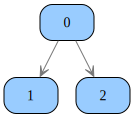

In [21]:
g.view()